# Emotion Detection




In [ ]:
#Pre-Processing Text Libraries
import nltk 
import string
import re

#Classifier Models libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier

#Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

#Performance Metrics libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Basic Libraries
import pandas as pd
import numpy as np

#Other libraries
import pickle
import os
import warnings
warnings.filterwarnings("ignore")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Rooth Path
#Drive Mount
root_path = "/content/drive/MyDrive/FinalYearProject/Dataset/"
resource_root_path = "/content/drive/MyDrive/FinalYearProject/Dataset/"

from google.colab import drive
drive.mount('/content/drive')

# 1. Dataset

In [ ]:
#Reads emotion Dataset
df = pd.read_csv(root_path+'text_emotions_neutral.csv')
df

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
24995,Yeah. Did you know that in Nevada there is a...,Neutral
24996,"I wonder why, not many have had facial hair a...",Neutral
24997,"That is sad, it is bad that we really wind up...",Neutral
24998,Same here. Since 1900 the taller candidate h...,Neutral


In [ ]:
#Print out DataSet size 
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
Y = df['sentiment']

Dataset size: (25000, 2)
Columns are: Index(['content', 'sentiment'], dtype='object')


## Dataset Emotion Analysis

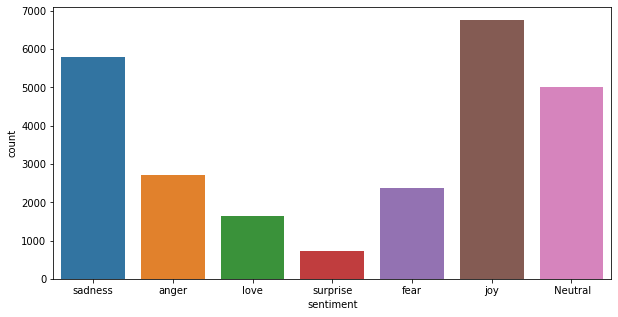

In [ ]:
#Shows amount of each emotions in the DataSet
sns.countplot(x = 'sentiment', data = df)
#Shows frequency of emotions in the DataSet
import collections
counter=collections.Counter(df['sentiment'])
counter

# 2. Pre-processing text data


## 2.1 Replace and Remove Emojis & Punctuations

In [2]:
#Read emojis dataset and then replace them with corrsponding text
emojis = pd.read_csv(resource_root_path+'emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

#Remove punctuation
def remove_punctuation(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

NameError: ignored

## 2.2 Tokenization

In [4]:
#Tokenize text by splitting text into smaller bits
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)
    
    return text
    
#Show tokens
df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

NameError: ignored

## 2.3 Remove Stopwords

In [ ]:
#Download dstopwords package 
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
#stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
            #  'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
            #    ,'brother','dad','basic','im',''])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Remove tokens
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


## 2.4 Lemmatization

In [ ]:
#Download WordNet packgae 
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
#Lemmatize words, find the root of the word
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


## All in one (Text preprocessing)

In [ ]:
#Returns Cleaned Data thanks to the different previous steps
def clean_text(text):
    text = remove_punctuation(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# 3. Feature Extraction

## 3.1 Count Vectorizer

Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


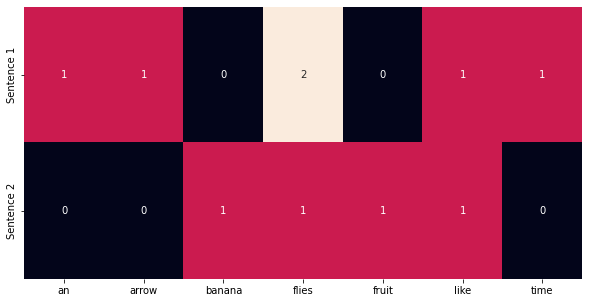

In [ ]:
document = ["My mom was so happy when she saw me and she hugged me!"]
  
#Create Vectorizer Object
vectorizer = CountVectorizer()
  
vectorizer.fit(document)
  
#Print the identified words with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
  
#Encode the Document and print findings
vector = vectorizer.transform(document)
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

## 3.2 TF-IDF

[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


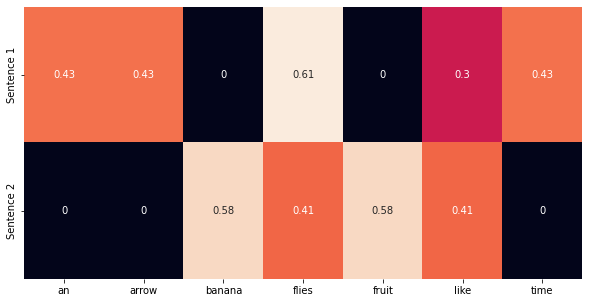

In [ ]:
#Apply TF-IDF on DataSet
from sklearn.feature_extraction.text import TfidfVectorizer

document = ['My mom was so happy when she saw me and she hugged me!']

#Initialise TF-IDF Vectorizer and print findings
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()
print (tfidf)
print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

#### Apply Model on DataSet

In [ ]:
#Split test and train data
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.3, random_state = 116)

In [ ]:
#Apply Count Vectorizer and TF-IDF on test and train data
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

# 4. Classifier Models




## 4.1 Support Vector Machine (SVM)

In [ ]:
#Initialise SVM Model and print its Perfomance Metrics
svm = SGDClassifier()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
#Accuracy score is the number of correct predictions
svm_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
svm_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
svm_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 88.587
Precision: 87.170
Recall: 84.115
F1-score: 85.517
              precision    recall  f1-score   support

     Neutral       0.90      0.93      0.91      1482
       anger       0.89      0.85      0.87       805
        fear       0.87      0.82      0.84       709
         joy       0.88      0.91      0.90      2092
        love       0.83      0.75      0.78       481
     sadness       0.91      0.92      0.91      1725
    surprise       0.83      0.71      0.77       206

    accuracy                           0.89      7500
   macro avg       0.87      0.84      0.86      7500
weighted avg       0.89      0.89      0.88      7500



## 4.2 Logistic Regression

In [ ]:
#Initialise Logisitc Regression Model and print its Perfomance Metrics
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

#Accuracy score is the number of correct predictions
lr_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
lr_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
lr_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 86.120
Precision: 86.869
Recall: 77.936
F1-score: 81.328
              precision    recall  f1-score   support

     Neutral       0.87      0.92      0.89      1482
       anger       0.89      0.79      0.84       805
        fear       0.88      0.75      0.81       709
         joy       0.83      0.92      0.87      2092
        love       0.83      0.61      0.70       481
     sadness       0.88      0.92      0.90      1725
    surprise       0.90      0.53      0.67       206

    accuracy                           0.86      7500
   macro avg       0.87      0.78      0.81      7500
weighted avg       0.86      0.86      0.86      7500



## 4.3 Random Forest Classifier


In [ ]:
#Initialise Random Forest Classifier Model and print its Perfomance Metrics
rfc = RandomForestClassifier(n_estimators=1, random_state=0)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

#Accuracy score is the number of correct predictions
rfc_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
rfc_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
rfc_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
rfc_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(rfc_acc*100))
print('Precision:', '{0:.3f}'.format(rfc_prec*100))
print('Recall:', '{0:.3f}'.format(rfc_recal*100))
print('F1-score:', '{0:.3f}'.format(rfc_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 66.867
Precision: 63.918
Recall: 64.851
F1-score: 64.243
              precision    recall  f1-score   support

     Neutral       0.64      0.72      0.68      1482
       anger       0.60      0.65      0.63       805
        fear       0.68      0.69      0.69       709
         joy       0.74      0.63      0.68      2092
        love       0.56      0.53      0.54       481
     sadness       0.69      0.71      0.70      1725
    surprise       0.56      0.60      0.58       206

    accuracy                           0.67      7500
   macro avg       0.64      0.65      0.64      7500
weighted avg       0.67      0.67      0.67      7500



## 4.4 Multinomial Naive Bayes Classifier

In [ ]:
#Initialise MultiNomial Niav Bayes Classifier
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

#Accuracy score is the number of correct predictions
mnb_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
mnb_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
mnb_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
mnb_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mnb_acc*100))
print('Precision:', '{0:.3f}'.format(mnb_prec*100))
print('Recall:', '{0:.3f}'.format(mnb_recal*100))
print('F1-score:', '{0:.3f}'.format(mnb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 71.587
Precision: 85.389
Recall: 48.643
F1-score: 48.970
              precision    recall  f1-score   support

     Neutral       0.87      0.89      0.88      1482
       anger       0.90      0.32      0.47       805
        fear       0.92      0.25      0.39       709
         joy       0.64      0.96      0.76      2092
        love       0.97      0.07      0.13       481
     sadness       0.68      0.92      0.78      1725
    surprise       1.00      0.00      0.01       206

    accuracy                           0.72      7500
   macro avg       0.85      0.49      0.49      7500
weighted avg       0.78      0.72      0.66      7500



## 4.5 Decision Tree Classifier

In [ ]:
#Initialise Decision Tree Classifier
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

#Accuracy score is the number of correct predictions
dt_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
dt_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
dt_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
dt_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(dt_acc*100))
print('Precision:', '{0:.3f}'.format(dt_prec*100))
print('Recall:', '{0:.3f}'.format(dt_recal*100))
print('F1-score:', '{0:.3f}'.format(dt_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 75.600
Precision: 73.877
Recall: 73.846
F1-score: 73.805
              precision    recall  f1-score   support

     Neutral       0.67      0.77      0.72      1482
       anger       0.79      0.77      0.78       805
        fear       0.74      0.73      0.74       709
         joy       0.77      0.73      0.75      2092
        love       0.71      0.70      0.71       481
     sadness       0.83      0.82      0.83      1725
    surprise       0.65      0.66      0.66       206

    accuracy                           0.76      7500
   macro avg       0.74      0.74      0.74      7500
weighted avg       0.76      0.76      0.76      7500



# 4.6 Multi Layer Perceptron (MLP)

In [ ]:
#Initialise Multi Layer Perception
mlp = MLPClassifier(random_state=5, max_iter=300)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

#Accuracy score is the number of correct predictions
mlp_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
mlp_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
mlp_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
mlp_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mlp_acc*100))
print('Precision:', '{0:.3f}'.format(mlp_prec*100))
print('Recall:', '{0:.3f}'.format(mlp_recal*100))
print('F1-score:', '{0:.3f}'.format(mlp_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 85.307
Precision: 82.381
Recall: 81.091
F1-score: 81.682
              precision    recall  f1-score   support

     Neutral       0.86      0.91      0.88      1482
       anger       0.85      0.82      0.83       805
        fear       0.83      0.78      0.80       709
         joy       0.88      0.85      0.86      2092
        love       0.72      0.73      0.72       481
     sadness       0.87      0.91      0.89      1725
    surprise       0.75      0.68      0.72       206

    accuracy                           0.85      7500
   macro avg       0.82      0.81      0.82      7500
weighted avg       0.85      0.85      0.85      7500



In [ ]:
def get_prec_recall_per_emotion(cm):
    per_emotion_precision = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[j][i]
            count_per_emotion += cm[j][i]
        per_emotion_precision.append(round((accurate/count_per_emotion)*100,3))
        
    per_emotion_recall = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[i][j]
            count_per_emotion += cm[i][j]
        per_emotion_recall.append(round((accurate/count_per_emotion)*100,3))
        
    return per_emotion_precision, per_emotion_recall

## Accuracy Visualization for all models

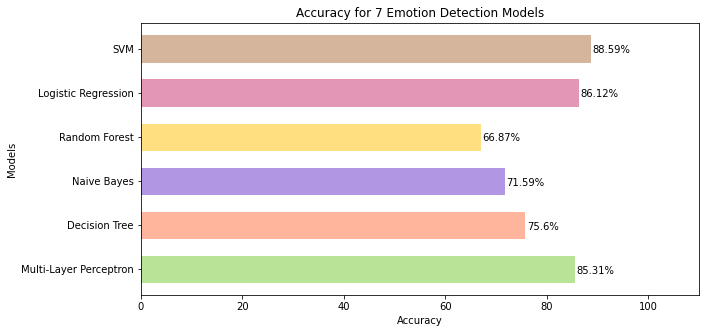

In [ ]:
#Visualise the Accuracy of All Models together 
algorithms = ['Multi-Layer Perceptron','Decision Tree','Naive Bayes','Random Forest','Logistic Regression','SVM']
algorithm_acc = [mlp_acc*100, dt_acc*100, mnb_acc*100,  rfc_acc*100, lr_acc*100, svm_acc*100]
 
fig = plt.figure(figsize =(10, 5))
bar_list = plt.barh(algorithms, algorithm_acc,height = 0.6,color='black')
bar_list[5].set_color('#D5B59C')
bar_list[4].set_color('#E396B6')
bar_list[3].set_color('#FFDF80')
bar_list[2].set_color('#B096E3')
bar_list[1].set_color('#FFB49C')
bar_list[0].set_color('#B9E396')
plt.xlabel('Accuracy',color='black')
plt.ylabel('Models',color='black')
plt.title('Accuracy for 7 Emotion Detection Models')
plt.xlim(0,110)

for i, v in enumerate(algorithm_acc):
    plt.text(v + 0.5, i - 0.1, str(round(v,2))+'%', color='black',fontsize=10)
    
plt.show()

## Precision of all models

In [ ]:
#Visualise Precision of all Models
svm_per_prec,svm_per_recall = get_prec_recall_per_emotion(svm_cm)
lr_per_prec,lr_per_recall = get_prec_recall_per_emotion(lr_cm)
rfc_per_prec,rfc_per_recall = get_prec_recall_per_emotion(rfc_cm)
mnb_per_prec,mnb_per_recall = get_prec_recall_per_emotion(mnb_cm)
dt_per_prec,dt_per_recall = get_prec_recall_per_emotion(dt_cm)
mlp_per_prec,mlp_per_recall = get_prec_recall_per_emotion(mlp_cm)

per_precision_list = pd.DataFrame({'Support vector Machine' : svm_per_prec,
                                'Logistic Regression' : lr_per_prec,
                                'Random Forest' : rfc_per_prec,
                                'Naive Bayes' : mnb_per_prec,
                                'Decision Tree' : dt_per_prec,
                                'Multi-Layer Perceptron': mlp_per_prec}, 
                                index=svm.classes_)
per_precision_list

,Support vector Machine,Logistic Regression,Random Forest,Naive Bayes,Decision Tree,Multi-Layer Perceptron
Neutral,89.648,86.574,63.924,87.060,67.460,86.311
anger,88.760,89.201,60.023,90.071,78.571,85.032
fear,86.697,87.849,68.106,91.753,74.143,83.133
joy,88.235,83.031,74.381,63.515,77.409,87.709
love,82.719,83.051,55.973,97.143,71.069,72.257
sadness,90.702,88.213,69.162,68.184,83.412,87.222
surprise,83.429,90.164,55.856,100.000,65.072,75.000


In [5]:
#Save all the models in a pickle file
with open(root_path+'/EmotionDetectionModels.pkl', 'wb') as f:  
    pickle.dump([svm, logisticRegr, rfc, mnb, dt, mlp], f)

NameError: ignored

## Load All Models From Disk

In [ ]:
#Load all saved Models 
if os.path.isfile(root_path+'/EmotionDetectionModels.pkl'):
    # Getting back the objects:
    with open(root_path+'EmotionDetectionModels_7','rb') as f:  
        svm, logisticRegr, rfc, mnb, dt, mlp = pickle.load(f)
        print('File Loaded Successfully')
else:
    print('File not Found')

File Loaded Successfully


# 6. Measure Emotions Predictions


In [ ]:
#Predict Emotions weight in data
emotion_model_weight = [0.3, 0.2 , 0.03, 0.3, 0.07, 0.1]    
def extract_emotions(list_emotion_prediction):
    emotion_scores = {}
    for emotions in Emotions:
        emotion_scores[emotions] = 0.0   
    for i in range(len(list_emotion_prediction)):
        emotion_scores[list_emotion_prediction[i]] += emotion_model_weight[i]
    se = sorted(emotion_scores.items(), key = lambda pair:pair[1],reverse=True)
    return se[0][0], round(se[0][1],2)

In [ ]:
while True:
    input_str = input("Hi! How are you?")
    if input_str == 'exit':
        break
        
    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))

    svm_emotion = svm.predict(processed_text)[0]
    lr_emotion = logisticRegr.predict(processed_text)[0]
    dt_emotion = dt.predict(processed_text)[0]
    mnb_emotion = mnb.predict(processed_text)[0]
    rfc_emotion = rfc.predict(processed_text)[0]

    list_emotion_pred = [svm_emotion, lr_emotion, rfc_emotion, mnb_emotion, dt_emotion]
    best_emotion, prob = extract_emotions(list_emotion_prediction)
    print('Best Emotion:',best_emotion,':',prob)

    print('Emotion using SVM: ',end = '')
    print(svm.predict(processed_text))
    print('Emotion using Logistic Regression: ',end = '')
    print(logisticRegr.predict(processed_text))
    print('Emotion using Decision Tree: ',end = '')
    print(dt.predict(processed_text))
    print('Emotion using Naive Bayes: ',end = '')
    print(mnb.predict(processed_text))
    print('Emotion using Random Forest: ',end = '')
    print(rfc.predict(processed_text))
    print()

What's in your mind: nothing


In [ ]:
df_chatbot = pd.read_csv(root_path+'Chatbot Dataset.csv',encoding='ISO-8859-1')
df_chatbot = df_chatbot.dropna(axis=0)
user_chat = df_chatbot['User'].tolist()
chatbot_reply = df_chatbot['Chatbot'].tolist()
chatbot_intent = df_chatbot['Intent'].tolist()
len(user_chat)

2064

In [ ]:
import csv
def save_data_csv(all_data_rows):
    count = 0
    with open(root_path+'Chatbot Dataset with Emotion.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for row_data in all_data_rows:
            writer.writerow(row_data)
            count+=1
    return count-1

In [ ]:
#Predict Emotions Of DataSet
all_data_rows = []
all_data_rows.append(['User','Chatbot','Intent','Emotion','Probability'])

for i in range(len(user_chat)):
    input_str = user_chat[i]
    reply = chatbot_reply[i]
    intent = chatbot_intent[i]
    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))

    svm_emotion = svm.predict(processed_text)[0]
    lr_emotion = logisticRegr.predict(processed_text)[0]
    dt_emotion = dt.predict(processed_text)[0]
    mnb_emotion = mnb.predict(processed_text)[0]
    rfc_emotion = rfc.predict(processed_text)[0]

    list_emotion_pred = [svm_emotion, lr_emotion, rfc_emotion, mnb_emotion, dt_emotion]
    best_emotion, prob = extract_emotions(list_emotion_prediction)

    row = [input_str, reply, intent, best_emotion, prob]
    all_data_rows.append(row)

print(save_data_csv(all_data_rows),'rows have been saved')

2064 data saved into file
